###  Machine Learning Process


###  Problem Formulation

- In this project, we want to investigate "what factors/variables affect a good or a bad loan"
- Make predictions whether a customer should get its loan approved or not based on their characteristics
- Hence our Dependent variable (y) is the Loan Approval (Yes/No) or if the Loan is Good or Bad

### Importing / Installing packages

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline



###  Loading the Raw Data

In [39]:
# Loading the data
raw_data = pd.read_csv(r'C:\Users\Kunal Rana\Downloads\Python-Tutorials-master\Introduction to ML - Logistic Regression Example\Logistic Regression Dummy Data v3.csv')
# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


##  Data Preprocessing

###  Exploratory Data Analysis

In [3]:
# Checking for null values

raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [4]:
# Visualize the NULL observations

raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Employment History'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(1001, 14)


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [6]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

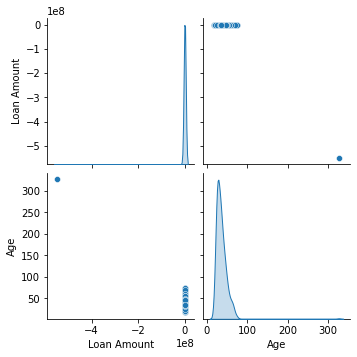

In [7]:
# Visualize the data using seaborn Pairplots

sns.pairplot(raw_data,diag_kind='kde')


###  Data Cleaning

In [8]:
# Deleting the outlier

raw_data = raw_data[raw_data['Age'] < 100]

raw_data.shape

(1000, 14)

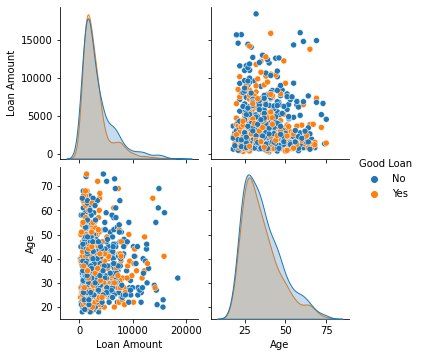

In [9]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data, hue = 'Good Loan')


<AxesSubplot:xlabel='Good Loan', ylabel='count'>

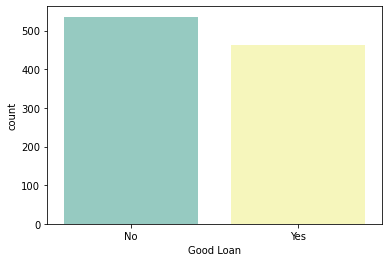

In [10]:
# Investigating the distr of y

sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')

In [11]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

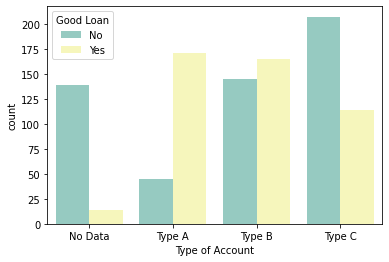

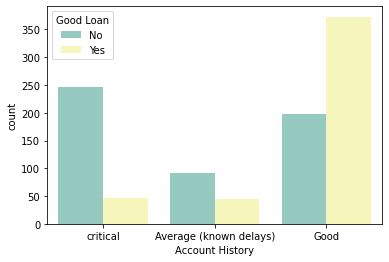

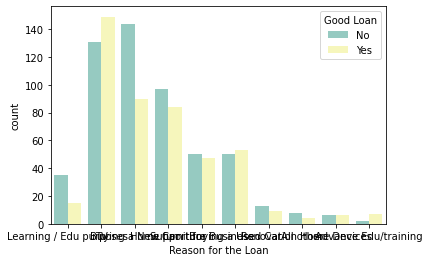

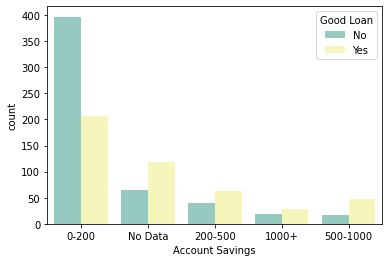

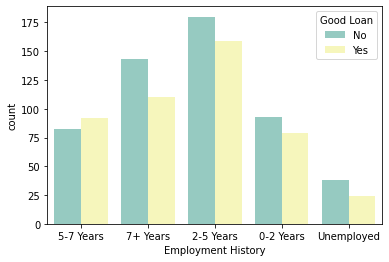

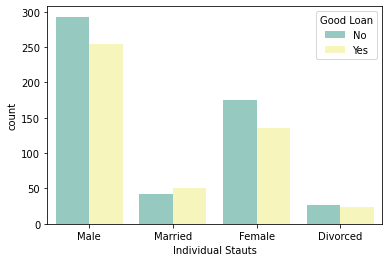

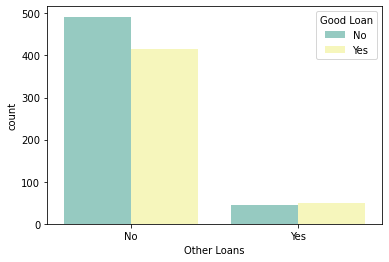

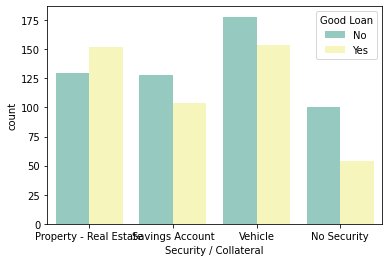

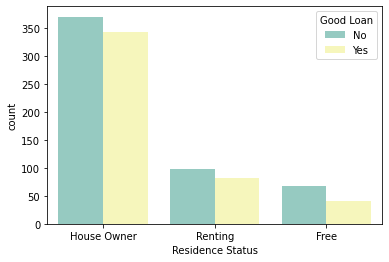

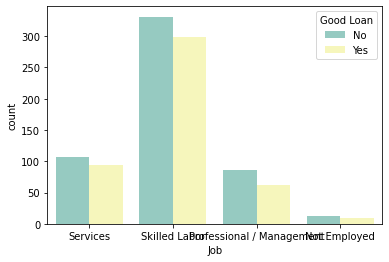

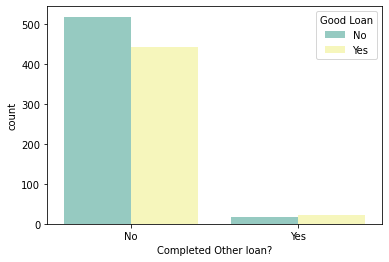

In [12]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

<AxesSubplot:>

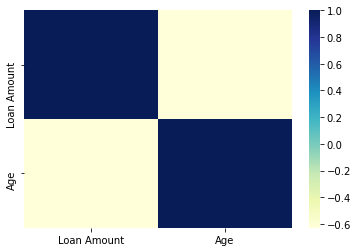

In [41]:
sns.heatmap(raw_data.corr(), cmap="YlGnBu")

In [13]:
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [14]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(raw_data.shape)
# print the shape
print(new_raw_data.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

# Visualizing the data
new_raw_data

(1000, 14)
(1000, 49)


<ipython-input-14-eb32f6149e36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
<ipython-input-14-eb32f6149e36>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


##  Feature Selection
In this example, we do not have many variables so we might use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [15]:
# Split the data into X & y

X = new_raw_data.drop('Good Loan', axis = 1).values
y = new_raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [16]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [17]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12122079844891431
The feature importance for Age is : 0.07962988068108864
The feature importance for Type of Account_No Data is : 0.054236275712355064
The feature importance for Type of Account_Type A is : 0.04973253970745607
The feature importance for Type of Account_Type B is : 0.0
The feature importance for Type of Account_Type C is : 0.026698167265803152
The feature importance for Account History_Average (known delays) is : 0.0026219295620499047
The feature importance for Account History_Good is : 0.19131616315491018
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is : 0.00657340597791024
The feature importance for Reason for the L

In [18]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


##  Splitting the Raw Data - Hold-out validation

In [19]:
# Print the shapes

print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]

(1000, 49)
(1000, 40)


In [20]:
new_raw_data.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [21]:
# Split the data into X & y

X = new_raw_data[columns_to_keep].values
X

y = new_raw_data['Good Loan']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(1000, 40)
(1000,)


In [22]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


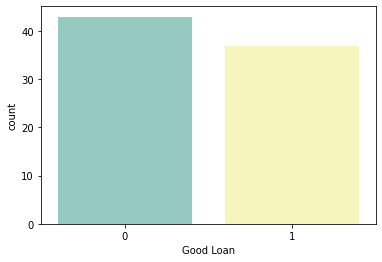

In [23]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_valid, palette = "Set3")

##  What is Logistic Regression 

- Famous statistical method for predicting two or more binary classes; not continues numbers. 
- Hence, Logistic regression is used for classification problems
- To make it work, we transform our linear regression line into a logistic regression curve so we can get a good fit of our data (see pics below) 

### How it works:
 
- We fit an "S" Shape logistic Function
- The curve tells you the porbability if a loan is good or bad
- If we have a high Credit score, there is a high probability that it's a good loan


##  Running Logistic Regression

In [24]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)


LogisticRegression(random_state=10)

In [25]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-1.41441465e+00,  1.89551503e+00, -1.24171731e-04,
         6.60322114e-03, -1.45175929e+00,  9.71756106e-01,
        -1.91489366e-01, -8.90671558e-02,  2.58479575e-01,
         5.29939064e-01,  1.61084246e-01,  5.01415585e-02,
         2.39664493e-01,  4.42354325e-01, -6.90157858e-01,
        -1.17223569e-01,  4.17369698e-02, -4.51682373e-01,
         3.13925413e-01,  1.69194102e-01, -3.79968216e-01,
         3.41166746e-02, -1.70529344e-01,  5.08263163e-01,
        -1.35459352e-01,  1.39613625e-02,  3.92004105e-01,
         4.73274747e-02, -3.69502781e-02,  3.65565905e-01,
         1.27444022e-01, -2.42493284e-01,  1.32442196e-01,
        -2.78851445e-01,  1.01799479e-01, -6.65916765e-02,
        -1.90785278e-03, -2.59928604e-01,  1.12388839e-01,
        -1.14837780e-01]])

##  Evaluating the Model

In [26]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))



The Training Accuracy is:  0.7791666666666667
The Testing Accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       387
           1       0.77      0.75      0.76       333

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [27]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

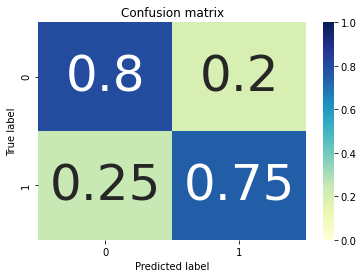

In [28]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [29]:
log_reg.classes_

array([0, 1])

In [30]:
cm.sum(axis=1)
cm_norm

array([[0.80361757, 0.19638243],
       [0.24924925, 0.75075075]])

In [31]:
cm

array([[311,  76],
       [ 83, 250]], dtype=int64)

In [32]:
cm.sum(axis=0)

array([394, 326], dtype=int64)

In [33]:
np.diag(cm)

array([311, 250], dtype=int64)

In [34]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


The True Positive Rate is: [0.80361757 0.75075075]
The Precision is: [0.7893401  0.76687117]
The False positive rate is: [0.24924925 0.19638243]
The False Negative Rate is:  [0.19638243 0.24924925]

The average TPR is: 0.7771841609050911
The average Precision is: 0.7781056335835073
The average False positive rate is: 0.22281583909490887
The average False Negative Rate is: 0.22281583909490887


In [35]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))


The Log Loss on Training is:  0.45612184705395276
The Log Loss on Testing Dataset is:  0.49358753585350656
